In [185]:
# 모듈 로딩
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
# 구글 트렌드 이더리움 검색량
eth_search_df = pd.read_csv("../project/data/eth_search.csv",header=1)

In [187]:
# 바이낸스 이더리움 거래량 및 가격
df = pd.read_parquet("../project/data/ETH-USDT.parquet")
df=df.reset_index()
df.drop(columns=["high","low","close","taker_buy_base_asset_volume","taker_buy_quote_asset_volume"],inplace=True)
df["open_year"]=df["open_time"].dt.strftime('%Y')
df["open_month"]=df["open_time"].dt.strftime('%Y-%m')
df["open_day"]=df["open_time"].dt.strftime('%Y-%m-%d')

In [188]:
# open_day 컬럼 datetime으로 바꿈
df["open_day"]=pd.to_datetime(df["open_day"])

In [189]:
# 바이낸스 비트코인 거래량 및 가격
btc_df = pd.read_parquet("../project/data/BTC-USDT.parquet")
btc_df=btc_df.reset_index()
btc_df.drop(columns=["high","low","close","taker_buy_base_asset_volume","taker_buy_quote_asset_volume"],inplace=True)
btc_df["open_year"]=df["open_time"].dt.strftime('%Y')
btc_df["open_month"]=btc_df["open_time"].dt.strftime('%Y-%m')
btc_df["open_day"]=btc_df["open_time"].dt.strftime('%Y-%m-%d')

In [190]:
# open_day 컬럼 datetime으로 바꿈
btc_df["open_day"]=pd.to_datetime(btc_df["open_day"])

In [191]:
# 컬럼 이름변경
btc_df.rename(columns={"open":"btc_price"},inplace=True)

In [192]:
# 이더리움 데이터 확인
df

,open_time,open,volume,quote_asset_volume,number_of_trades,open_year,open_month,open_day
0,2017-08-17 04:00:00,301.130005,0.426430,128.410873,2,2017,2017-08,2017-08-17
1,2017-08-17 04:01:00,301.130005,2.757870,830.477417,4,2017,2017-08,2017-08-17
2,2017-08-17 04:02:00,300.000000,0.099300,29.790001,2,2017,2017-08,2017-08-17
3,2017-08-17 04:03:00,300.000000,0.313890,94.167000,3,2017,2017-08,2017-08-17
4,2017-08-17 04:04:00,301.130005,0.232020,69.868179,1,2017,2017-08,2017-08-17
...,...,...,...,...,...,...,...,...
2753100,2022-11-16 22:39:00,1205.719971,51.230000,61776.988281,214,2022,2022-11,2022-11-16
2753101,2022-11-16 22:40:00,1206.150024,92.429901,111506.515625,243,2022,2022-11,2022-11-16
2753102,2022-11-16 22:41:00,1206.349976,129.377106,156018.796875,269,2022,2022-11,2022-11-16
2753103,2022-11-16 22:42:00,1205.550049,111.508202,134362.187500,294,2022,2022-11,2022-11-16


In [193]:
# 비트코인 데이터 확인
btc_df

,open_time,btc_price,volume,quote_asset_volume,number_of_trades,open_year,open_month,open_day
0,2017-08-17 04:00:00,4261.479980,1.775183,7.564907e+03,3,2017,2017-08,2017-08-17
1,2017-08-17 04:01:00,4261.479980,0.000000,0.000000e+00,0,2017,2017-08,2017-08-17
2,2017-08-17 04:02:00,4280.560059,0.261074,1.117543e+03,2,2017,2017-08,2017-08-17
3,2017-08-17 04:03:00,4261.479980,0.012008,5.117185e+01,3,2017,2017-08,2017-08-17
4,2017-08-17 04:04:00,4261.479980,0.140796,5.999993e+02,1,2017,2017-08,2017-08-17
...,...,...,...,...,...,...,...,...
2753177,2022-11-16 23:55:00,16672.869141,47.899929,7.984622e+05,1523,NaN,2022-11,2022-11-16
2753178,2022-11-16 23:56:00,16666.060547,86.314827,1.438798e+06,2169,NaN,2022-11,2022-11-16
2753179,2022-11-16 23:57:00,16675.179688,85.274879,1.421645e+06,2066,NaN,2022-11,2022-11-16
2753180,2022-11-16 23:58:00,16670.240234,56.534920,9.425971e+05,1605,NaN,2022-11,2022-11-16


In [195]:
# 데이터 병합
df=pd.merge(df,btc_df[["open_time","btc_price"]],how="inner",on="open_time")

C:\Users\KDP-024\AppData\Local\Temp\ipykernel_1656\303365940.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rotation=90,labels=df[["open","open_month"]].groupby(by="open_month").mean().index)


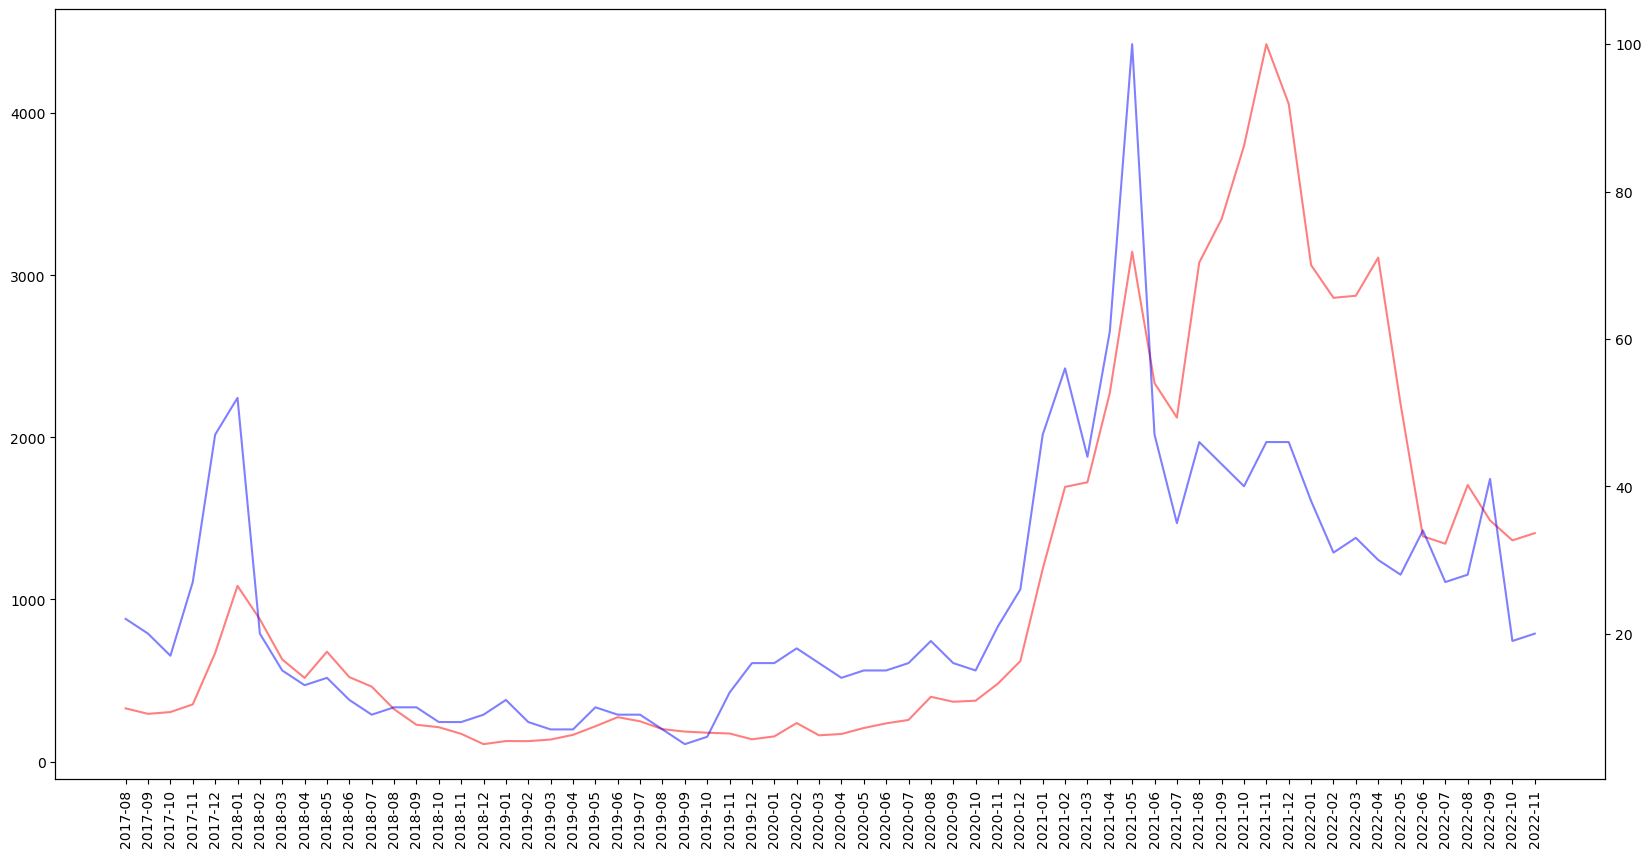

In [196]:
# 검색량과 이더리움 가격과의 관계를 보기 위해 시각화
fig = plt.figure(figsize=(20,10))
ax1 = fig.subplots()
ax1.plot(df[["open","open_month"]].groupby(by="open_month").mean().index, df[["open","open_month"]].groupby(by="open_month").mean()["open"].values, color = 'red', alpha = 0.5)
ax2 = ax1.twinx()
ax2.plot(df[["open","open_month"]].groupby(by="open_month").mean().index, eth_search_df["이더리움: (전 세계)"].values, color = 'blue', alpha = 0.5)
ax1.set_xticklabels(rotation=90,labels=df[["open","open_month"]].groupby(by="open_month").mean().index)
plt.show()

In [198]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier,XGBRFRegressor
from sklearn.model_selection import train_test_split

In [199]:
trainx,testx,trainy,testy = train_test_split(eth_search_df["이더리움: (전 세계)"].to_frame(),df[["open","open_month"]].groupby(by="open_month").mean()["open"])

# 검색의 경우 효과적이지 효과적으로 예측하지 못함
x1 =XGBRFRegressor()
x1.fit(trainx,trainy)
print(x1.score(trainx,trainy))
print(x1.score(testx,testy))

0.9486284670157741
0.4187470725263589


In [203]:
eth_price_change_df=pd.read_csv("../project/data/eth_가격.csv").drop(columns=["Unnamed: 0"])

In [204]:
# 이더리움 가격 일일변화량
eth_price_change_df

,open_day,change_day
0,2017-08-17,0.869995
1,2017-08-18,-8.040009
2,2017-08-19,-3.049988
3,2017-08-20,8.190002
4,2017-08-21,24.190002
...,...,...
1913,2022-11-12,-32.939940
1914,2022-11-13,-35.900024
1915,2022-11-14,20.699951
1916,2022-11-15,10.209961


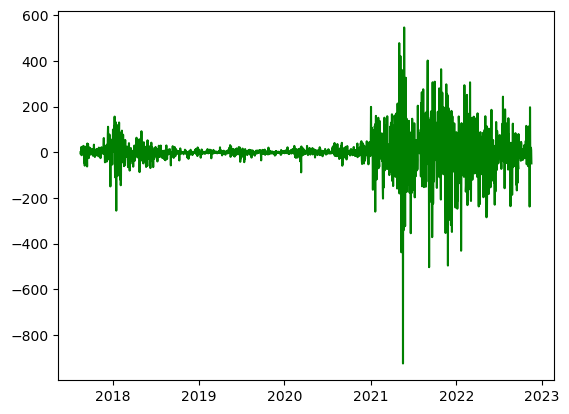

In [366]:
# 가격 변화량을 시각화해서 확인
plt.plot(eth_price_change_df["open_day"],eth_price_change_df["change_day"],color="g")

<Axes: xlabel='open_day', ylabel='change_day'>

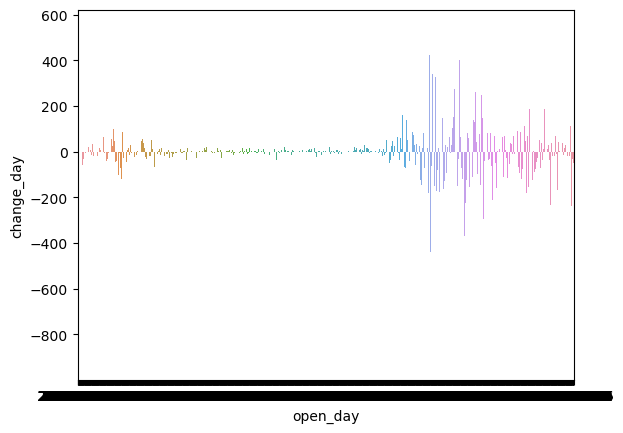

In [206]:
# 가격 변화량을 시각화해서 확인
import matplotlib.font_manager as fm
font_path = r'c:\USERS\KDP-024\APPDATA\LOCAL\MICROSOFT\WINDOWS\FONTS\KBO DIA GOTHIC_BOLD.TTF'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.size'] = 25
fig = plt.figure(figsize=(20,10))
ax1 = fig.subplots()
ax1.plot(df.loc[::,"open_time"], df.loc[::,"open"], color = 'blue', alpha = 0.5)
ax1.set_title("이더리움 가격",fontproperties=font_name)
ax1.set_xticklabels(labels=[2017,2018,2019,2020,2021,2022,2023],fontproperties=font_name)
ax1.set_ylabel("가격($)",fontproperties=font_name)
ax1.set_xlabel("년도",fontproperties=font_name)
ax2 = ax1.twinx()
ax2.plot(df.loc[::,"open_time"], df.loc[::,"number_of_trades"], color = 'red', alpha = 0.5)
ax2.set_ylabel("거래수(건)",fontproperties=font_name)
plt.show()
sns.barplot(x=eth_price_change_df["open_day"],y=eth_price_change_df["change_day"])

In [207]:
# datetime으로 형변환
eth_price_change_df["open_day"]=pd.to_datetime(eth_price_change_df["open_day"])

In [209]:
# 형변환 확인
eth_price_change_df["open_day"]

0      2017-08-17
1      2017-08-18
2      2017-08-19
3      2017-08-20
4      2017-08-21
          ...    
1913   2022-11-12
1914   2022-11-13
1915   2022-11-14
1916   2022-11-15
1917   2022-11-16
Name: open_day, Length: 1918, dtype: datetime64[ns]

In [211]:
# 데이터프레임 병합
df=pd.merge(df,eth_price_change_df,how="inner",on="open_day")

{'whiskers': [<matplotlib.lines.Line2D at 0x1af5dca7460>,
 'caps': [<matplotlib.lines.Line2D at 0x1af5dca79d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af5dca72b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1af5dca7ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af5dca4370>],
 'means': []}

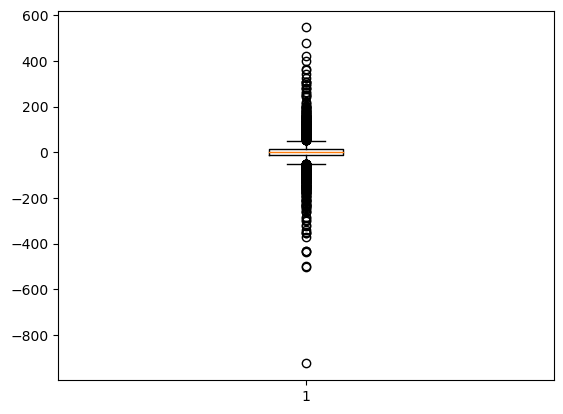

In [213]:
# boxplot으로 이상치 확인
# 가격데이터라서 쉽사리 제거x
plt.boxplot(eth_price_change_df["change_day"])

In [214]:
# 파생변수 만들기 가격변화량이 양수면 1, 음수면 0
df["change_day_dummy"] =df["change_day"] >0
df["change_day_dummy"]=df["change_day_dummy"].astype(int)

In [216]:
# 데이터 확인
df

,open_time,open,volume,quote_asset_volume,number_of_trades,open_year,open_month,open_day,btc_price,change_day,change_day_dummy
0,2017-08-17 04:00:00,301.130005,0.426430,128.410873,2,2017,2017-08,2017-08-17,4261.479980,0.869995,1
1,2017-08-17 04:01:00,301.130005,2.757870,830.477417,4,2017,2017-08,2017-08-17,4261.479980,0.869995,1
2,2017-08-17 04:02:00,300.000000,0.099300,29.790001,2,2017,2017-08,2017-08-17,4280.560059,0.869995,1
3,2017-08-17 04:03:00,300.000000,0.313890,94.167000,3,2017,2017-08,2017-08-17,4261.479980,0.869995,1
4,2017-08-17 04:04:00,301.130005,0.232020,69.868179,1,2017,2017-08,2017-08-17,4261.479980,0.869995,1
...,...,...,...,...,...,...,...,...,...,...,...
2731500,2022-11-16 22:39:00,1205.719971,51.230000,61776.988281,214,2022,2022-11,2022-11-16,16534.839844,-48.069946,0
2731501,2022-11-16 22:40:00,1206.150024,92.429901,111506.515625,243,2022,2022-11,2022-11-16,16542.029297,-48.069946,0
2731502,2022-11-16 22:41:00,1206.349976,129.377106,156018.796875,269,2022,2022-11,2022-11-16,16544.669922,-48.069946,0
2731503,2022-11-16 22:42:00,1205.550049,111.508202,134362.187500,294,2022,2022-11,2022-11-16,16539.300781,-48.069946,0


In [217]:
# 푸리에 변환
import numpy as np
def get_fft(data):
    fft = np.fft.fft(data) / len(data)  
    fft_result = abs(fft)
    return fft_result

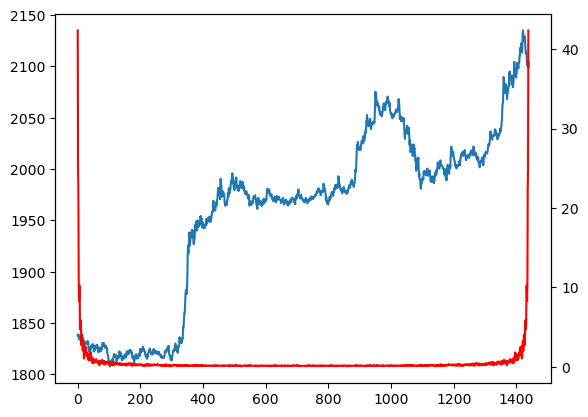

In [218]:
# 푸리에변환 시각화
start_index = 2000000
stop_index = 2001440
start_index = start_index + 1440
stop_index = stop_index + 1440
original = df["open"][start_index:stop_index]

fig = plt.figure()
ax= fig.add_subplot(111)
ax.plot(np.arange(0,len(original)),original)

ax2 = ax.twinx()
_fft= get_fft(original)

ax2.plot(_fft[1:],c="red")

In [220]:
# 거래량과 거래수를 독립 변수으로 하여 가격을 추정
trainx,testx,trainy,testy = train_test_split(df[["quote_asset_volume","number_of_trades"]],df["open"])

# 2개의 변수만 가지고는 효과적이지 않음
l1 =XGBRFRegressor()
l1.fit(trainx,trainy)
print(l1.score(trainx,trainy))
print(l1.score(testx,testy))

0.5834594844735026
0.58188686522967


In [222]:
# 참고 논문 (다변량 분석을 적용한 비트코인 가격 등락에 미치는 영향 연구) 으로 금시세를 독립변수로 추가
gold = pd.read_csv("../project/data/금 선물 과거 데이터.csv")
gold=gold[["날짜","시가"]]
gold.columns=["open_day","gold_price"]
gold=gold[::-1]
gold=gold.reset_index(drop=True)
gold["open_day"]=pd.to_datetime(gold["open_day"])

In [225]:
# 기존 데이터와 병합
df=pd.merge(df,gold,how="left")

In [227]:
# 금시세로 인한 결측치 채움
df=df.fillna(method="ffill")

In [228]:
# 금시세 데이터가 str이라서 float로 형변환
df["gold_price"]=df["gold_price"].str.replace(",","").astype(float)

In [230]:
# 데이터 상관관계 확인
df[["open","volume","quote_asset_volume","number_of_trades","change_day","gold_price","btc_price"]].corr()

,open,volume,quote_asset_volume,number_of_trades,change_day,gold_price,btc_price
open,1.000000,0.065504,0.419758,0.411582,-0.004081,0.581542,0.925850
volume,0.065504,1.000000,0.696648,0.706431,-0.035316,0.252085,0.123268
quote_asset_volume,0.419758,0.696648,1.000000,0.906997,-0.058644,0.341516,0.432738
number_of_trades,0.411582,0.706431,0.906997,1.000000,-0.040131,0.368972,0.435968
change_day,-0.004081,-0.035316,-0.058644,-0.040131,1.000000,0.001684,0.027857
gold_price,0.581542,0.252085,0.341516,0.368972,0.001684,1.000000,0.656039
btc_price,0.925850,0.123268,0.432738,0.435968,0.027857,0.656039,1.000000


In [312]:
# 데이터 불균형을 해소하기 위해서 오버샘플링
from imblearn.over_sampling import RandomOverSampler

In [313]:
# 오버샘플링
oversample = RandomOverSampler(sampling_strategy="minority")
X_over, y_over = oversample.fit_resample(df[["gold_price","volume","number_of_trades"]], df["change_day_dummy"])

In [326]:
X_over

,gold_price,volume,number_of_trades
0,1290.0,0.426430,2
1,1290.0,2.757870,4
2,1290.0,0.099300,2
3,1290.0,0.313890,3
4,1290.0,0.232020,1
...,...,...,...
2777693,1356.6,176.894806,299
2777694,1821.4,536.604492,735
2777695,1901.4,68.424599,200
2777696,1835.8,741.505615,748


In [378]:
# 모듈로딩
from sklearn.linear_model import LinearRegression,LogisticRegression
from xgboost import XGBClassifier,XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [293]:
#  모델 객체선언 ,xgboost의 분류 모델
l1  =XGBClassifier(n_estimators=500)

In [282]:
# 스케일러
scaler = StandardScaler()

In [327]:
scaler.fit(X_over)

StandardScaler()

In [328]:
scaled_df=scaler.transform(X_over)

In [329]:
# train,test 데이터 분리
trainx,testx,trainy,testy = train_test_split(X_over,y_over,random_state=10)

In [330]:
# fit
l1.fit(trainx,trainy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [331]:
# train 데이터 score : accuracy
l1.score(trainx,trainy)

0.8626185814341183

In [332]:
# test 데이터 score : accuracy
l1.score(testx,testy)

0.8604874536487022

In [348]:
# predict
pred=l1.predict(testx)

In [353]:
# 상승하락에 대한 분류 모델은 꽤나 효과적으로 나타남
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86    341022
           1       0.87      0.85      0.86    353403

    accuracy                           0.86    694425
   macro avg       0.86      0.86      0.86    694425
weighted avg       0.86      0.86      0.86    694425



In [369]:
# 이번에는 가격변화량을 맞추고자 train,test분리
train_x,test_x,train_y,test_y= train_test_split(df[["gold_price","volume","number_of_trades"]], df["change_day"])

In [370]:
# 객체선언
l2 = XGBRegressor()

In [371]:
# 학습
l2.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [372]:
# Regressor 과소적합됨
l2.score(train_x,train_y)

0.673205126353098

In [373]:
# test 역시 과소적합됨
l2.score(test_x,test_y)

0.6700975667685745

In [379]:
# RandomForestRegressor로도 시도
l3 = RandomForestRegressor()

In [380]:
# 학습
l3.fit(train_x,train_y)

RandomForestRegressor()

In [381]:
# 과대적합됨
l3.score(train_x,train_y)

0.9551247221223353

In [382]:
l3.score(test_x,test_y)

0.6783387830242351